In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Conv1D, BatchNormalization, Lambda, Input, Reshape
from tensorflow.keras import regularizers
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from keras.models import load_model
import numpy as np
import pickle
from keras.models import load_model
from keras.utils import to_categorical
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Attention
import matplotlib.pyplot as plt
import pickle
import random
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Lambda, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


### Part 1
### Visualize 3 random images with their corresponding sequence.

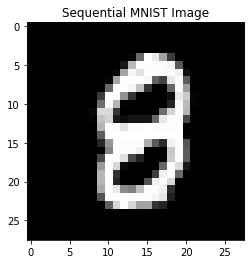

Sequence: [0, 0, 0, 0, 15, 15, 15, 12, 11, 10, 10, 19, 18, 10, 10, 11, 11, 10, 10, 10, 10, 10, 10, 12, 0, 0, 0, 0]
Label: 8


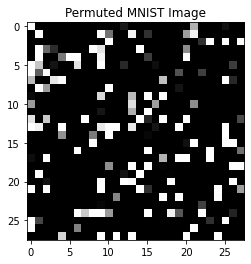

Sequence: [0, 1, 23, 8, 1, 9, 0, 25, 1, 15, 13, 15, 7, 4, 25, 8, 23, 20, 26, 1, 12, 0, 17, 22, 6, 0, 21, 11]
Label: 6


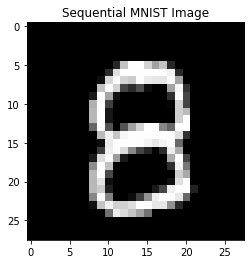

Sequence: [0, 0, 0, 0, 0, 13, 13, 11, 10, 9, 9, 9, 9, 9, 13, 13, 11, 10, 9, 9, 20, 19, 9, 14, 11, 0, 0, 0]
Label: 8


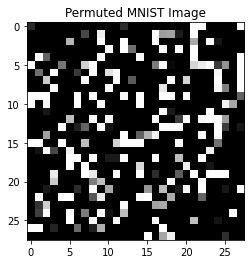

Sequence: [21, 16, 9, 10, 1, 0, 3, 7, 3, 0, 0, 17, 8, 4, 12, 0, 2, 5, 5, 7, 18, 8, 1, 12, 2, 5, 0, 15]
Label: 2


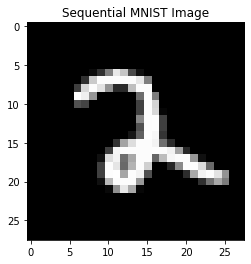

Sequence: [0, 0, 0, 0, 0, 0, 11, 11, 8, 6, 15, 15, 16, 16, 15, 14, 16, 14, 21, 11, 11, 12, 0, 0, 0, 0, 0, 0]
Label: 2


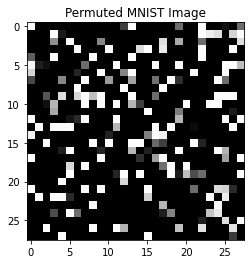

Sequence: [13, 3, 5, 6, 8, 26, 9, 18, 6, 24, 20, 15, 11, 3, 16, 2, 5, 0, 7, 5, 4, 0, 1, 24, 5, 27, 2, 15]
Label: 2


In [24]:
# Load the sequential and permuted MNIST datasets
with open('D:/sequentialMNIST.pickle', 'rb') as f:
    seq_mnist = pickle.load(f)

with open('D:/permutedMNIST.pickle', 'rb') as f:
    perm_mnist = pickle.load(f)

# Get the images and labels from the datasets
seq_images = seq_mnist['train']['images']
seq_labels = seq_mnist['train']['labels']

perm_images = perm_mnist['train']['images']
perm_labels = perm_mnist['train']['labels']

# Select 3 random images from the datasets
seq_indices = random.sample(range(len(seq_images)), 3)
perm_indices = random.sample(range(len(perm_images)), 3)

# Display the images and print their corresponding sequences
for i in range(3):
    seq_index = seq_indices[i]
    perm_index = perm_indices[i]
    
    # Display the sequential MNIST image and its corresponding sequence
    seq_image = np.reshape(seq_images[seq_index], (28, 28))
    seq_label = seq_labels[seq_index]
    #print(seq_label)
    seq_seq = [np.argmax(seq_image[j]) for j in range(seq_image.shape[0])]
    
    plt.imshow(seq_image, cmap='gray')
    plt.title('Sequential MNIST Image')
    plt.show()
    print('Sequence:', seq_seq)
    print('Label:', seq_label)
    
    # Display the permuted MNIST image and its corresponding sequence
    perm_image = np.reshape(perm_images[perm_index], (28, 28))
    perm_label = perm_labels[perm_index]
    
    # Randomly permute the image and generate the corresponding sequence
    permuted_indices = np.random.permutation(28)
    permuted_image = perm_image[:, permuted_indices]
    perm_seq = [np.argmax(permuted_image[j]) for j in range(permuted_image.shape[0])]
    
    plt.imshow(permuted_image, cmap='gray')
    plt.title('Permuted MNIST Image')
    plt.show()
    print('Sequence:', perm_seq)
    print('Label:', perm_label)



# Sequential MNIST

## Simple RNN

Epoch 1/15
375/375 [==============================] - 40s 93ms/step - loss: 0.6185 - accuracy: 0.7952 - val_loss: 0.2448 - val_accuracy: 0.9258
Epoch 2/15
375/375 [==============================] - 34s 92ms/step - loss: 0.1786 - accuracy: 0.9465 - val_loss: 0.1397 - val_accuracy: 0.9566
Epoch 3/15
375/375 [==============================] - 33s 87ms/step - loss: 0.1207 - accuracy: 0.9641 - val_loss: 0.1064 - val_accuracy: 0.9695
Epoch 4/15
375/375 [==============================] - 33s 88ms/step - loss: 0.0958 - accuracy: 0.9706 - val_loss: 0.0906 - val_accuracy: 0.9732
Epoch 5/15
375/375 [==============================] - 33s 89ms/step - loss: 0.0740 - accuracy: 0.9772 - val_loss: 0.0806 - val_accuracy: 0.9751
Epoch 6/15
375/375 [==============================] - 33s 88ms/step - loss: 0.0628 - accuracy: 0.9808 - val_loss: 0.0700 - val_accuracy: 0.9787
Epoch 7/15
375/375 [==============================] - 30s 81ms/step - loss: 0.0543 - accuracy: 0.9835 - val_loss: 0.0817 - val_accuracy:

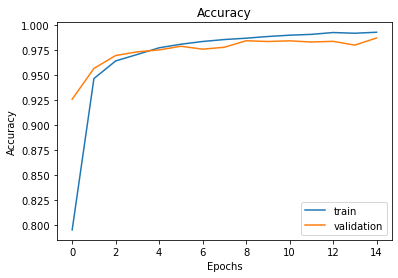

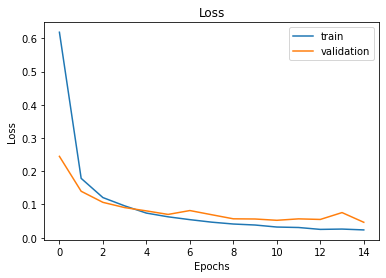

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

with open('D:/sequentialMNIST.pickle', 'rb') as f:
    data = pickle.load(f)

train_images = data['train']['images']
train_labels = data['train']['labels']

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)

train_images = train_images.reshape((-1, 28, 28))

idx = np.random.permutation(len(train_images))
train_images = train_images[idx]
train_labels = train_labels[idx]

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42, shuffle=True, stratify=train_labels)

# Define and train the RNN model
model1 = Sequential([
    LSTM(128, input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model1.fit(train_images, train_labels, epochs=15, batch_size=128, validation_data=(val_images, val_labels))

# Make predictions on the validation set and calculate the accuracy and f1 score
val_pred = model1.predict(val_images)
val_acc = np.mean(np.argmax(val_labels, axis=1) == np.argmax(val_pred, axis=1))
#val_f1 = f1_score(np.argmax(val_labels, axis=1), np.argmax(val_pred, axis=1), average='macro')
val_f1 = f1_score(np.argmax(val_labels, axis=1), np.argmax(val_pred, axis=1), average=None)
print('Validation accuracy:', val_acc)
print('Validation f1 score:', val_f1)

# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## With Weight Initialization and Regularization

Epoch 1/15
375/375 [==============================] - 97s 229ms/step - loss: 1.8228 - accuracy: 0.7983 - val_loss: 0.6204 - val_accuracy: 0.9283
Epoch 2/15
375/375 [==============================] - 80s 214ms/step - loss: 0.3397 - accuracy: 0.9525 - val_loss: 0.2423 - val_accuracy: 0.9474
Epoch 3/15
375/375 [==============================] - 82s 219ms/step - loss: 0.1653 - accuracy: 0.9683 - val_loss: 0.1329 - val_accuracy: 0.9732
Epoch 4/15
375/375 [==============================] - 83s 221ms/step - loss: 0.1216 - accuracy: 0.9755 - val_loss: 0.1264 - val_accuracy: 0.9708
Epoch 5/15
375/375 [==============================] - 82s 218ms/step - loss: 0.0996 - accuracy: 0.9794 - val_loss: 0.1333 - val_accuracy: 0.9680
Epoch 6/15
375/375 [==============================] - 82s 218ms/step - loss: 0.0842 - accuracy: 0.9826 - val_loss: 0.0944 - val_accuracy: 0.9802
Epoch 7/15
375/375 [==============================] - 80s 213ms/step - loss: 0.0773 - accuracy: 0.9842 - val_loss: 0.0941 - val_ac

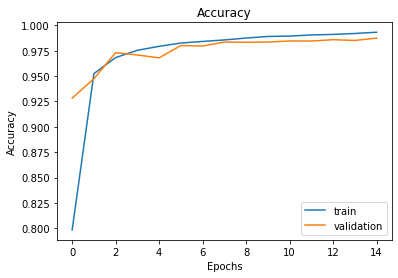

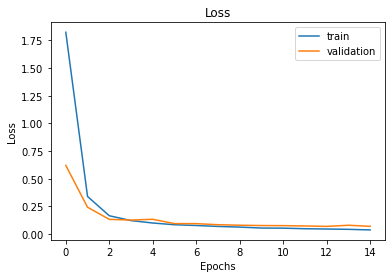

In [25]:
# Load the dataset
with open('D:/sequentialMNIST.pickle', 'rb') as f:
    data = pickle.load(f)

train_images = data['train']['images']
train_labels = data['train']['labels']

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)

train_images = train_images.reshape((-1, 28, 28))

idx = np.random.permutation(len(train_images))
train_images = train_images[idx]
train_labels = train_labels[idx]

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42, shuffle=True, stratify=train_labels)

# Define and train the RNN model
model2 = Sequential([
    LSTM(128, kernel_initializer='he_normal', input_shape=(28, 28), return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64, kernel_initializer='he_normal', return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model2.fit(train_images, train_labels, epochs=15, batch_size=128, validation_data=(val_images, val_labels))

# Make predictions on the validation set and calculate the accuracy
val_pred = model2.predict(val_images)
val_acc = np.mean(np.argmax(val_labels, axis=1) == np.argmax(val_pred, axis=1))
val_f1 = f1_score(np.argmax(val_labels, axis=1), np.argmax(val_pred, axis=1), average=None)

print('Validation accuracy:', val_acc)
print('Validation f1 score:', val_f1)

# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## With WI + R + Attention

Epoch 1/15
375/375 [==============================] - 19s 47ms/step - loss: 0.4541 - accuracy: 0.8526 - val_loss: 0.1563 - val_accuracy: 0.9503
Epoch 2/15
375/375 [==============================] - 17s 46ms/step - loss: 0.1240 - accuracy: 0.9628 - val_loss: 0.1144 - val_accuracy: 0.9627
Epoch 3/15
375/375 [==============================] - 17s 46ms/step - loss: 0.0839 - accuracy: 0.9732 - val_loss: 0.0856 - val_accuracy: 0.9738
Epoch 4/15
375/375 [==============================] - 17s 46ms/step - loss: 0.0655 - accuracy: 0.9798 - val_loss: 0.0685 - val_accuracy: 0.9789
Epoch 5/15
375/375 [==============================] - 17s 46ms/step - loss: 0.0503 - accuracy: 0.9849 - val_loss: 0.0659 - val_accuracy: 0.9776
Epoch 6/15
375/375 [==============================] - 17s 46ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0676 - val_accuracy: 0.9778
Epoch 7/15
375/375 [==============================] - 17s 46ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0481 - val_accuracy:

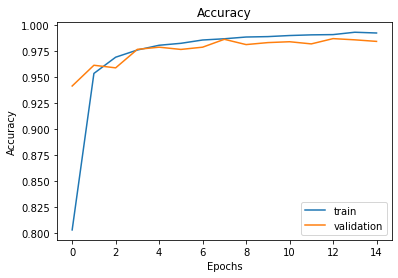

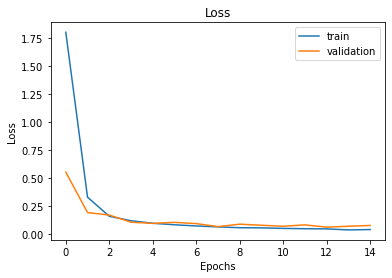

In [70]:
# Load the dataset
with open('D:/sequentialMNIST.pickle', 'rb') as f:
    data = pickle.load(f)

train_images = data['train']['images']
train_labels = data['train']['labels']

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)

train_images = train_images.reshape((-1, 28, 28))

idx = np.random.permutation(len(train_images))
train_images = train_images[idx]
train_labels = train_labels[idx]

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, 
                                                                      test_size=0.2, random_state=42, 
                                                                      shuffle=True, stratify=train_labels)


def simple_attention(inputs):
    # Compute attention scores
    attention_scores = tf.matmul(inputs, tf.transpose(inputs, [0, 2, 1]))
    
    # Compute attention weights
    attention_weights = tf.nn.softmax(attention_scores, axis=-1)
    
    # Compute attention outputs
    attention_outputs = tf.matmul(attention_weights, inputs)
    
    return attention_outputs

model3 = keras.Sequential()
model3.add(layers.LSTM(128, input_shape=(28, 28), return_sequences=True))
model3.add(layers.Lambda(simple_attention))
model3.add(layers.Flatten())
model3.add(layers.Dense(10, activation='softmax'))

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model3.fit(train_images, train_labels, epochs=15, batch_size=128, validation_data=(val_images, val_labels))

val_pred = model3.predict(val_images)
val_acc = np.mean(np.argmax(val_labels, axis=1) == np.argmax(val_pred, axis=1))
val_f1 = f1_score(np.argmax(val_labels, axis=1), np.argmax(val_pred, axis=1), average=None)

print('Validation accuracy:', val_acc)
print('Validation f1 score:', val_f1)

# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
model2.save('rnn_model2_sequential.h5')

In [73]:
model3.save('rnn_model_best_sequential.h5')

375/375 [==============================] - 3s 7ms/step


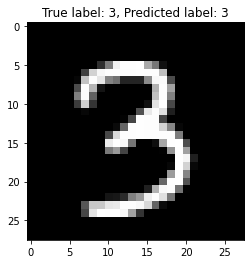

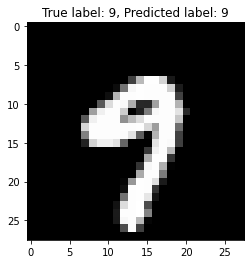

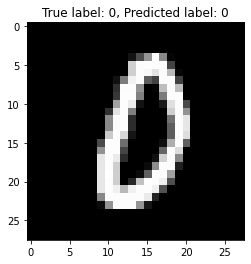

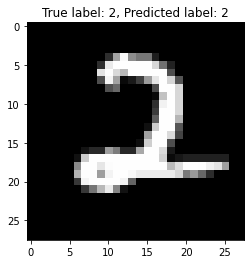

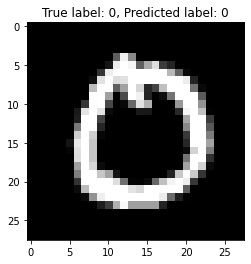

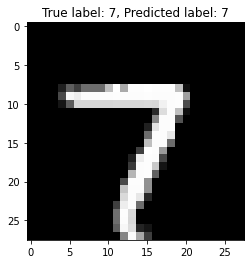

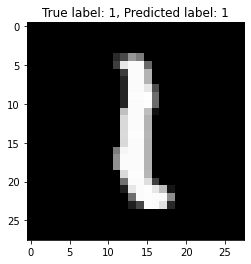

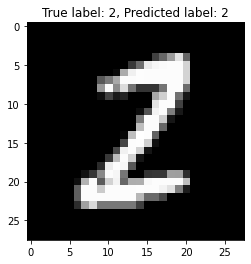

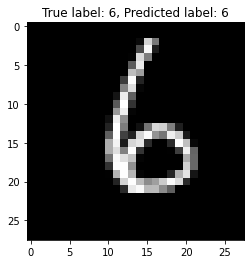

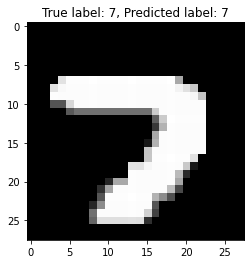

In [4]:
with open('D:/sequentialMNIST.pickle', 'rb') as f:
    data = pickle.load(f)

train_images = data['train']['images']
train_labels = data['train']['labels']

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)

train_images = train_images.reshape((-1, 28, 28))

idx = np.random.permutation(len(train_images))
train_images = train_images[idx]
train_labels = train_labels[idx]

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, 
                                                                      test_size=0.2, random_state=42, 
                                                                      shuffle=True, stratify=train_labels)

# Load the trained model from disk
model = load_model('rnn_model_best_sequential.h5')
# Make predictions on the validation set
val_pred = model.predict(val_images)

# Print the first 10 images in the validation set along with their true and predicted labels
for i in range(10):
    image = val_images[i]
    true_label = np.argmax(val_labels[i])
    pred_label = np.argmax(val_pred[i])
    
    plt.imshow(image, cmap='gray')
    plt.title('True label: {}, Predicted label: {}'.format(true_label, pred_label))
    plt.show()


In [ ]:
#### Demo

In [2]:
from tensorflow.keras.models import load_model
import pickle
model = load_model('rnn_model_best_sequential.h5')

# Load the test data
with open('sequential_mnist_test.pickle', 'rb') as f:
    data = pickle.load(f)

test_images = data['test']['images']
test_labels = data['test']['labels']

# Preprocess the test data
test_images = test_images.astype('float32') / 255.0
test_labels = to_categorical(test_labels)

test_images = test_images.reshape((-1, 28, 28))

# Make predictions on the test data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the accuracy and F1 score
accuracy = np.mean(predicted_labels == test_labels.argmax(axis=1))
f1score = f1_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

print('Test accuracy:', accuracy)
print('F1 score:', f1score)


# Permutated MNIST

Epoch 1/15
375/375 [==============================] - 40s 91ms/step - loss: 0.7940 - accuracy: 0.7390
Epoch 2/15
375/375 [==============================] - 36s 96ms/step - loss: 0.3648 - accuracy: 0.8854
Epoch 3/15
375/375 [==============================] - 37s 100ms/step - loss: 0.2809 - accuracy: 0.9120
Epoch 4/15
375/375 [==============================] - 35s 93ms/step - loss: 0.2373 - accuracy: 0.9261
Epoch 5/15
375/375 [==============================] - 35s 94ms/step - loss: 0.2006 - accuracy: 0.9373
Epoch 6/15
375/375 [==============================] - 34s 90ms/step - loss: 0.1743 - accuracy: 0.9457
Epoch 7/15
375/375 [==============================] - 35s 94ms/step - loss: 0.1597 - accuracy: 0.9510
Epoch 8/15
375/375 [==============================] - 35s 93ms/step - loss: 0.1459 - accuracy: 0.9541
Epoch 9/15
375/375 [==============================] - 35s 92ms/step - loss: 0.1324 - accuracy: 0.9576
Epoch 10/15
375/375 [==============================] - 35s 92ms/step - loss: 0.12

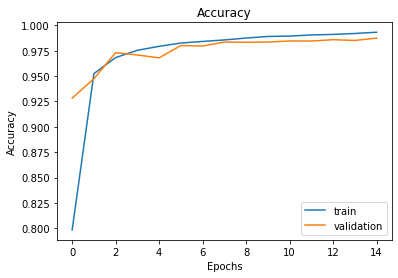

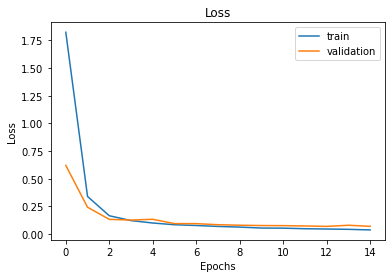

In [30]:
# Load the permuted MNIST data and split into training and validation sets
with open('D:/permutedMNIST.pickle', 'rb') as f:
    data = pickle.load(f)

train_images = data['train']['images']
train_labels = data['train']['labels']

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)

train_images = train_images.reshape((-1, 28, 28))

idx = np.random.permutation(len(train_images))
train_images = train_images[idx]
train_labels = train_labels[idx]

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42, shuffle=True, stratify=train_labels)

# Define and train the RNN model
model4 = Sequential([
    LSTM(128, input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model4.fit(train_images, train_labels, epochs=15, batch_size=128)

# Make predictions on the validation set and calculate the accuracy
val_pred = model4.predict(val_images)
val_acc = np.mean(np.argmax(val_labels, axis=1) == np.argmax(val_pred, axis=1))
val_f1 = f1_score(np.argmax(val_labels, axis=1), np.argmax(val_pred, axis=1), average=None)

print('Validation accuracy:', val_acc)
print('Validation f1 score:', val_f1)

# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## With Weight Initialization and Regularization

Epoch 1/15
375/375 [==============================] - 31s 72ms/step - loss: 1.7985 - accuracy: 0.8029 - val_loss: 0.5525 - val_accuracy: 0.9416
Epoch 2/15
375/375 [==============================] - 28s 74ms/step - loss: 0.3290 - accuracy: 0.9537 - val_loss: 0.1920 - val_accuracy: 0.9616
Epoch 3/15
375/375 [==============================] - 27s 72ms/step - loss: 0.1588 - accuracy: 0.9693 - val_loss: 0.1698 - val_accuracy: 0.9591
Epoch 4/15
375/375 [==============================] - 27s 71ms/step - loss: 0.1192 - accuracy: 0.9763 - val_loss: 0.1061 - val_accuracy: 0.9769
Epoch 5/15
375/375 [==============================] - 27s 71ms/step - loss: 0.0964 - accuracy: 0.9809 - val_loss: 0.0957 - val_accuracy: 0.9790
Epoch 6/15
375/375 [==============================] - 27s 72ms/step - loss: 0.0831 - accuracy: 0.9827 - val_loss: 0.1046 - val_accuracy: 0.9768
Epoch 7/15
375/375 [==============================] - 27s 72ms/step - loss: 0.0726 - accuracy: 0.9859 - val_loss: 0.0936 - val_accuracy:

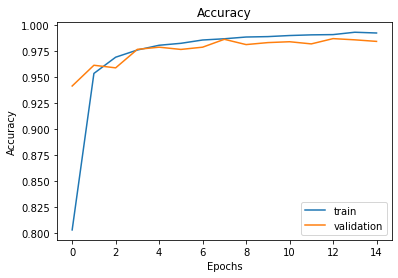

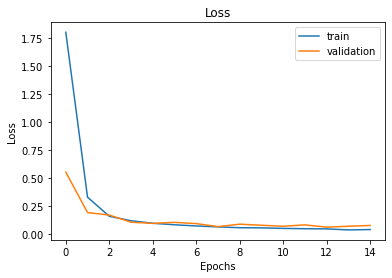

In [69]:
# Load the dataset
with open('D:/sequentialMNIST.pickle', 'rb') as f:
    data = pickle.load(f)

train_images = data['train']['images']
train_labels = data['train']['labels']

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)

train_images = train_images.reshape((-1, 28, 28))

idx = np.random.permutation(len(train_images))
train_images = train_images[idx]
train_labels = train_labels[idx]

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42, shuffle=True, stratify=train_labels)

# Define and train the RNN model
model5 = Sequential([
    LSTM(128, kernel_initializer='he_normal', input_shape=(28, 28), return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64, kernel_initializer='he_normal', return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model5.fit(train_images, train_labels, epochs=15, batch_size=128, validation_data=(val_images, val_labels))

# Make predictions on the validation set and calculate the accuracy
val_pred = model5.predict(val_images)
val_acc = np.mean(np.argmax(val_labels, axis=1) == np.argmax(val_pred, axis=1))
val_f1 = f1_score(np.argmax(val_labels, axis=1), np.argmax(val_pred, axis=1), average=None)

print('Validation accuracy:', val_acc)
print('Validation f1 score:', val_f1)

# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
## With WI + R + Attention

Epoch 1/15
375/375 [==============================] - 20s 49ms/step - loss: 0.7525 - accuracy: 0.7554 - val_loss: 0.4328 - val_accuracy: 0.8627
Epoch 2/15
375/375 [==============================] - 19s 51ms/step - loss: 0.3652 - accuracy: 0.8867 - val_loss: 0.3082 - val_accuracy: 0.9029
Epoch 3/15
375/375 [==============================] - 18s 49ms/step - loss: 0.2796 - accuracy: 0.9124 - val_loss: 0.2325 - val_accuracy: 0.9256
Epoch 4/15
375/375 [==============================] - 19s 50ms/step - loss: 0.2331 - accuracy: 0.9268 - val_loss: 0.2457 - val_accuracy: 0.9212
Epoch 5/15
375/375 [==============================] - 19s 50ms/step - loss: 0.2038 - accuracy: 0.9354 - val_loss: 0.1897 - val_accuracy: 0.9388
Epoch 6/15
375/375 [==============================] - 19s 51ms/step - loss: 0.1756 - accuracy: 0.9436 - val_loss: 0.1767 - val_accuracy: 0.9447
Epoch 7/15
375/375 [==============================] - 19s 50ms/step - loss: 0.1572 - accuracy: 0.9508 - val_loss: 0.1644 - val_accuracy:

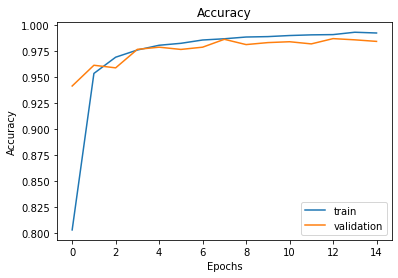

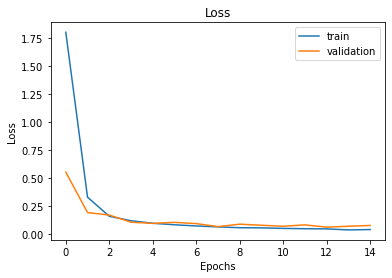

In [71]:
# Load the dataset
with open('D:/permutedMNIST.pickle', 'rb') as f:
    data = pickle.load(f)

train_images = data['train']['images']
train_labels = data['train']['labels']

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)

train_images = train_images.reshape((-1, 28, 28))

idx = np.random.permutation(len(train_images))
train_images = train_images[idx]
train_labels = train_labels[idx]

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, 
                                                                      test_size=0.2, random_state=42, 
                                                                      shuffle=True, stratify=train_labels)


def simple_attention(inputs):
    # Compute attention scores
    attention_scores = tf.matmul(inputs, tf.transpose(inputs, [0, 2, 1]))
    
    # Compute attention weights
    attention_weights = tf.nn.softmax(attention_scores, axis=-1)
    
    # Compute attention outputs
    attention_outputs = tf.matmul(attention_weights, inputs)
    
    return attention_outputs

model6 = keras.Sequential()
model6.add(layers.LSTM(128, input_shape=(28, 28), return_sequences=True))
model6.add(layers.Lambda(simple_attention))
model6.add(layers.Flatten())
model6.add(layers.Dense(10, activation='softmax'))

model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model6.fit(train_images, train_labels, epochs=15, batch_size=128, validation_data=(val_images, val_labels))

val_pred = model6.predict(val_images)
val_acc = np.mean(np.argmax(val_labels, axis=1) == np.argmax(val_pred, axis=1))
val_f1 = f1_score(np.argmax(val_labels, axis=1), np.argmax(val_pred, axis=1), average=None)

print('Validation accuracy:', val_acc)
print('Validation f1 score:', val_f1)

# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [74]:
model5.save('rnn_model_best_permutated.h5')

In [75]:
model6.save('rnn_model6_permutated.h5')

375/375 [==============================] - 3s 7ms/step


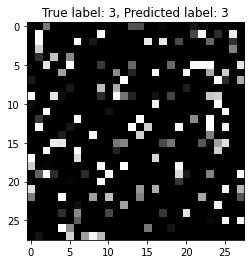

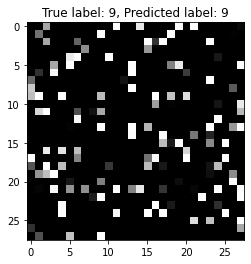

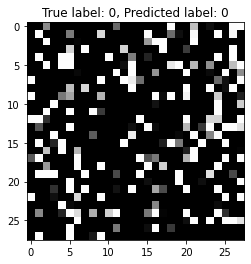

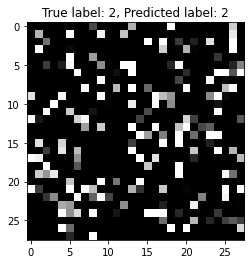

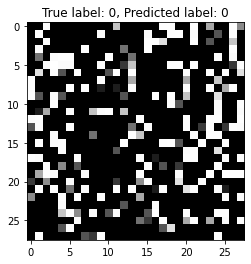

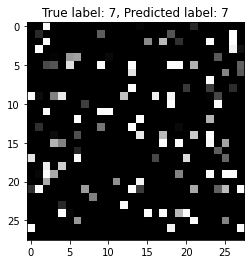

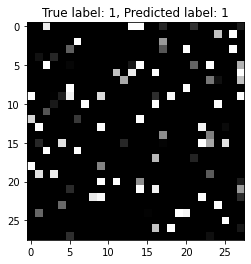

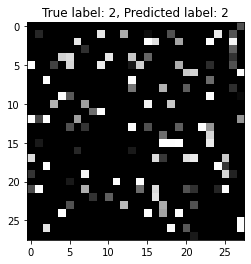

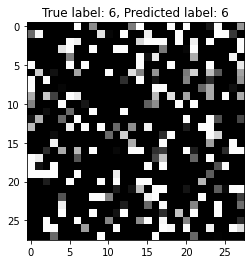

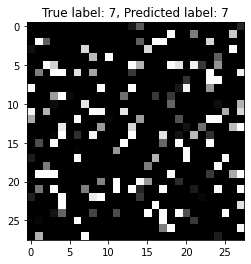

In [4]:
with open('D:/permutedMNIST.pickle', 'rb') as f:
    data = pickle.load(f)

train_images = data['train']['images']
train_labels = data['train']['labels']

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)

train_images = train_images.reshape((-1, 28, 28))

idx = np.random.permutation(len(train_images))
train_images = train_images[idx]
train_labels = train_labels[idx]

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, 
                                                                      test_size=0.2, random_state=42, 
                                                                      shuffle=True, stratify=train_labels)
# Load the trained model from disk
model = load_model('rnn_model6_permutated.h5')

# Make predictions on the validation set
val_pred = model.predict(val_images)

# Print the first 10 images in the validation set along with their true and predicted labels
for i in range(10):
    image = val_images[i]
    true_label = np.argmax(val_labels[i])
    pred_label = np.argmax(val_pred[i])
    
    plt.imshow(image, cmap='gray')
    plt.title('True label: {}, Predicted label: {}'.format(true_label, pred_label))
    plt.show()

In [ ]:
# Load the model
model = load_model('rnn_model_best_permutated.h5')

# Load the test data
with open('sequential_mnist_test.pickle', 'rb') as f:
    data = pickle.load(f)

test_images = data['test']['images']
test_labels = data['test']['labels']

# Preprocess the test data
test_images = test_images.astype('float32') / 255.0
test_labels = to_categorical(test_labels)

test_images = test_images.reshape((-1, 28, 28))

# Make predictions on the test data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the accuracy and F1 score
accuracy = np.mean(predicted_labels == test_labels.argmax(axis=1))
f1score = f1_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

print('Test accuracy:', accuracy)
print('F1 score:', f1score)
